1) Using Friedmann Equation given in HW3:
$$\frac{H(z)^2}{H_0^2} = \Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3 + \Omega_{\Lambda} + (1-\Omega_0)(1+z)^2$$
Substituting $a = \frac{1}{1+z}$ gives:
$$ \frac{\dot{a}}{a} = H_0(\frac{\Omega_{r,0}}{a^4} + \frac{\Omega_{m,0}}{a^3} + \Omega_{\Lambda} + \frac{1-\Omega_0}{a^2})^{1/2}  $$

a) For a Loitering Universe, $\dot{a} \sim 0$, giving:
$$ \frac{\Omega_{r,0}}{a^4} + \frac{\Omega_{m,0}}{a^3} + \Omega_{\Lambda} + \frac{1-\Omega_0}{a^2} = 0 $$

or
 
$$ \Omega_{r,0} + a\Omega_{m,0} + a^4\Omega_{\Lambda} + a^2(1-\Omega_0) = 0 $$ 

Making $ a = constant $, and hence describing a Loitering Universe.

Distributing the $a^2$ to $(1-\Omega_0)$ and solving for $\Omega_0$ gives the following condition:

$$ \Omega_0 = \frac{\Omega_{r,0}}{a^2} + \frac{\Omega_{m,0}}{a} + a^2\Omega_{\Lambda} + 1 $$

Substituting $\Omega_0 = \Omega_{r,0} + \Omega_{m,0} + \Omega_{\Lambda}$ and algebra:

$$ \Omega_{m,0}(1-\frac{1}{a}) + \Omega_{r,0}(1-\frac{1}{a^2}) + \Omega_{\Lambda}(1-a^2) = 1 $$

Since a Loitering Universe is described by $\dot{a} \sim 0$ but $\dot{a}\neq 0$, in the code below, I use today's value for the Hubble Paramter multiplied by $10^{-2}$ to make $\dot{a_0}\sim0$

I then use the relation $a(t) = a_0 - \dot{a_0}\Delta$t to calculate the new scale factor after some timestep $\Delta$t. With this new scale factor $a(t)$, I can then calcultate the new $\dot{a(t)}$ from the Friedmann Equation above (second from top) and repeat this process until I have gone back 14 Gyrs. 

The figure produced shows a slight decrease in the scale factor over 14 Gyrs, accurately describing a Loitering Universe with $\dot{a}\sim0$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from IPython.core.debugger import Tracer

from astropy import units as u
from astropy import constants as const
 
%matplotlib inline


Omega_m =  0.3021516799571746
Omega_r =  0.039368019989299285
Omega_l =  0.87903266716573
Omega_0 =  1.2205523671122038  describing a closed Universe


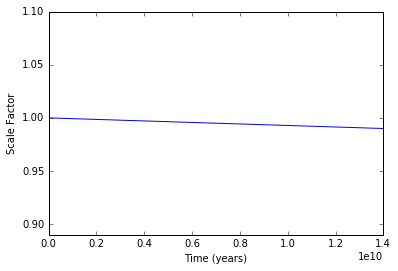

In [70]:
#define friedmann equation as function of scale factor. 
#find values for omega_m, omega_r, omega_l for:
#    Loitering Universe (with positive matter density)
#    big crunch universe
#plot results showing scale factor as function of time, so 2 plots,
#showing how scale factor evolves with time for each universe.
#so need an equation a(t) for each above case
#graph that shit
Mpc = u.def_unit('Mpc', u.pc * 10**6)
H_0 = 70 * u.km /(u.s * u.Mpc)
H_0 = H_0.decompose()
H_0 = H_0.to(1/u.yr)
H_0 = 1e-2*H_0 # H_0 = a_dot_now ~ 0 for a loitering Universe; the 1e-50 makes a_dot_now ~0, and is used later
t_lim = 14e09 #how far back to calc scale factor, years


a_dot_prev = H_0 
a_prev = 1
deltaT = 1e6 *u.yr # years
a_list = np.array([a_prev])
a_dot_list = np.array([a_dot_prev.value]) *(1/u.yr)# 1/years

omega_0 = 2 #to start the below while loop

while omega_0 >= 2:
    m = np.random.uniform(0,1)
    r = np.random.uniform(0,1)
    l = np.random.uniform(0,1)
    omega_0 = m + r + l
    if omega_0 < 1:
        k = -1
        shape = 'open'
        break # remove break (or below breaks) to guarantee a specific shape for universe
    elif omega_0 == 1:
        k = 0
        shape = 'flat'
        break
    elif omega_0 >1:
        k = 1
        shape = 'closed'
        break

        
print ('Omega_m = ',m)
print ('Omega_r = ',r)
print ('Omega_l = ',l)
print ('Omega_0 = ',omega_0,' describing a',shape,'Universe')

while True: #working back in time, from now until Big Bang
    a_next = a_prev - a_dot_prev * deltaT #decreasing
    a_dot_next = a_next * H_0 * (r/a_next**4 + m/a_next**3 + l + (1-omega_0)/a_next**2)**(1/2)
    a_list = np.append(a_list,a_next)
    a_dot_list = np.append(a_dot_list,a_dot_next)
    
    
    a_prev = a_next 
    a_dot_prev = a_dot_next
    if (a_list.shape[0]*deltaT).value == t_lim:
        break

        
        
time = np.arange(0,t_lim,deltaT.value)
fig,ax = plt.subplots(1,1)
ax.set_ylim(min(a_list)-0.1,max(a_list)+0.1)
ax.set_xlabel('Time (years)')
ax.set_ylabel('Scale Factor')
ax.plot(time,a_list)    


                    
           
                
            





b) Big Crunch Universe.

Here, $\dot{a} \neq 0$, and in order for a Big Crunch to occur, $\Omega_0 > 1 $ 

Using the Friedmann Equation from above:

$$ \frac{\dot{a}}{a} = H_0(\frac{\Omega_{r,0}}{a^4} + \frac{\Omega_{m,0}}{a^3} + \Omega_{\Lambda} + \frac{1-\Omega_0}{a^2})^{1/2}  $$

I follow the same process as above, using $H_0 = \dot{a_0}$ and $a(t) = a_0 + \dot{a_0}\Delta$t to get a new scale factor after some timestep. I force $\Omega_0 > 1$, while allowing $\Omega_m,\Omega_r,$ and $\Omega_{\Lambda}$ to vary between 0 and 1. 



Omega_m =  0.9077027126678691
Omega_r =  0.10529780661955945
Omega_l =  0.2732515477533741
Omega_0 =  1.2862520670408026  describing a closed Universe


/home/dm1681/anaconda3/lib/python3.5/site-packages/astropy/units/quantity.py:885: RuntimeWarning: invalid value encountered in sqrt
  return super(Quantity, self).__pow__(other)


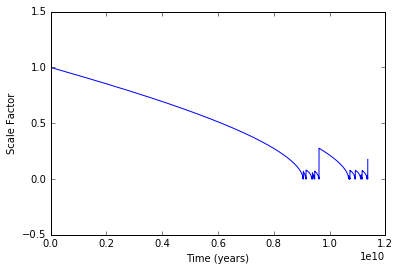

In [73]:
#solve for today
Mpc = u.def_unit('Mpc', u.pc * 10**6)
H_0 = 70 * u.km /(u.s * u.Mpc)
H_0 = H_0.decompose()
H_0 = H_0.to(1/u.yr)

t_lim = 14e09 #how far back to calc scale factor, years


a_dot_prev = H_0
a_prev = 1
deltaT = 1e6 *u.yr # years
a_list = np.array([a_prev])
a_dot_list = np.array([a_dot_prev.value]) *(1/u.yr)# 1/years

while True:
    m = np.random.uniform(0,1)
    r = np.random.uniform(0,1)
    l = np.random.uniform(0,1)
    omega_0 = m + r + l
    if omega_0 < 1:
        k = -1
        shape = 'open'
    elif omega_0 == 1:
        k = 0
        shape = 'flat'
    elif omega_0 >1:
        k = 1
        shape = 'closed'
        break


print ('Omega_m = ',m)
print ('Omega_r = ',r)
print ('Omega_l = ',l)
print ('Omega_0 = ',omega_0,' describing a',shape,'Universe')



while True: #working back in time, from now until Big Bang
    a_next = a_prev - a_dot_prev * deltaT #decreasing
    a_dot_next = a_next * H_0 * (r/a_next**4 + m/a_next**3 + l + (1-omega_0)/a_next**2)**(1/2)
    a_list = np.append(a_list,a_next)
    a_dot_list = np.append(a_dot_list,a_dot_next)
    
    
    a_prev = a_next 
    a_dot_prev = a_dot_next
    if (a_list.shape[0]*deltaT).value == t_lim:
        break

        
        
time = np.arange(0,t_lim,deltaT.value)
a_list = abs(a_list) #absolute value because negative scale factor doesnt make sense
fig,ax = plt.subplots(1,1)
ax.set_ylim(min(a_list)-0.5,max(a_list)+0.5)
ax.set_xlabel('Time (years)')
ax.set_ylabel('Scale Factor')
ax.plot(time,a_list)

2) Here, we are trying to find $$\sigma_v \approx 10^{3}\frac{km}{s}(\frac{\theta D_s}{28'' D_{ls}})^{1/2}$$

We start with the relation between mass and density: 

$$ M =\rho V $$ 

Using the provided density profile for isothermal sphere and the volume of a sphere:

$$ M = \frac{\sigma^2}{2\pi Gr^2}\frac{4\pi r^3}{3} $$ 

Using the Small Angle Approximation $ R = D_L\theta$ for a lens ring with radius, $\theta$. This gives us: 

$$ M = \frac{2\sigma^2D_L\theta}{3G} $$ 

Next, if $\theta = \theta_E$ with the mass enclosed in the Einstein radius:

$$ \theta_E^2 = \frac{4GMD_{LS}}{c^2D_LD_S} $$

Solve for M:

$$ M = \frac{\theta_E^2c^2 D_L D_S}{4 G D_{LS}} $$

Setting both equations for M equal to each other and canceling like terms/algebra gives the general form of the desired relation:

$$ \sigma^2 = \frac{3c^2\theta_ED_S}{8D_{LS}} $$

If $\theta = \alpha \beta \theta_E$, we can then write the general form for any $\theta$

$$ \sigma^2 = \frac{3c^2\theta D_S}{8\alpha \beta D_{LS}} $$

Setting $\frac{3c^2}{8\alpha} = 10^6 \frac{km}{s}$ and $\beta^{1/2} = 28''$ gives the original form:

$$ \sigma_v \approx 10^{3}\frac{km}{s}(\frac{\theta D_s}{28'' D_{ls}})^{1/2} $$

where $10^3 \frac{km}{s}$ is the average velocity dispersion for a rich galaxy cluster producing lensing of $28''$